# standard plot

C:\Users\fengxiang.mao\AppData\Local\Temp\ipykernel_7980\748922594.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


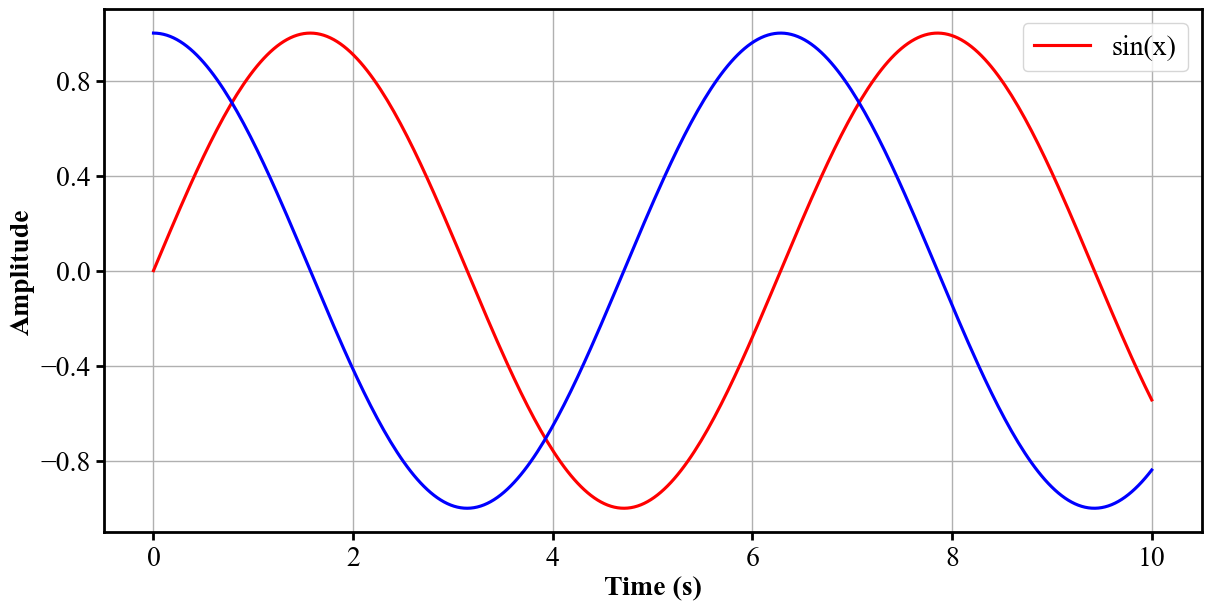

In [3]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from plot_style import *

x = np.linspace(0, 10, 300)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = make_standard_figure(figsize=( 12,6),grid=True, legend='auto')  # legend='auto'表示自动放置图例
ax.plot(x, y1, label='sin(x)')  # 线宽/颜色顺序已按规范
ax.plot(x, y2, label='cos(x)')

ax.set_xlabel('Time (s)')       # 标题已自动加粗、字号=20、Times New Roman
ax.set_ylabel('Amplitude')

# 已自动放右上角；若需要微调边框或透明度，可这样：
# fig, ax, place_legend = make_standard_figure(return_legend_placer=True)
# ...绘图后...
#place_legend(frameon=True)  # 例如需要图例带边框

fig.show()
# save_figure(fig, 'my_plot.png', dpi=400, transparent=False)

In [4]:
from matplotlib import font_manager as fm

# 方式 A：名字是否可见
has_tnr = 'Times New Roman' in [f.name for f in fm.fontManager.ttflist]
print('Has Times New Roman?', has_tnr)

# 方式 B：拿到字体文件路径（若找不到会回退到其他字体）
path = fm.findfont('Times New Roman', fallback_to_default=False)
print('Path:', path)  # 如果抛错 / 找不到，就表示系统没有该字体


Has Times New Roman? True
Path: C:\Windows\Fonts\times.ttf


# plot strain v.s. depth in some certain time point

In [2]:
%reload_ext autoreload
%autoreload 2


import h5py
import pandas as pd
from plot_style import make_standard_figure, plot_depth_profiles_in_window, decode_stamps_to_datetimeindex

f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/Evo_5_6_7_Sep_2025/Evo 7 (flowback)/Zgabay A14H - flowback - strain change.h5','r')
# f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 5 (POP)/Zgabay A14H - pop - strain change.h5','r')



dstrain = (f1['data'])
depth = (f1['depth'])
date_plot = (f1['stamps'])

print(dstrain.shape)  # (时间点数, 深度点数)


(3415, 57204)


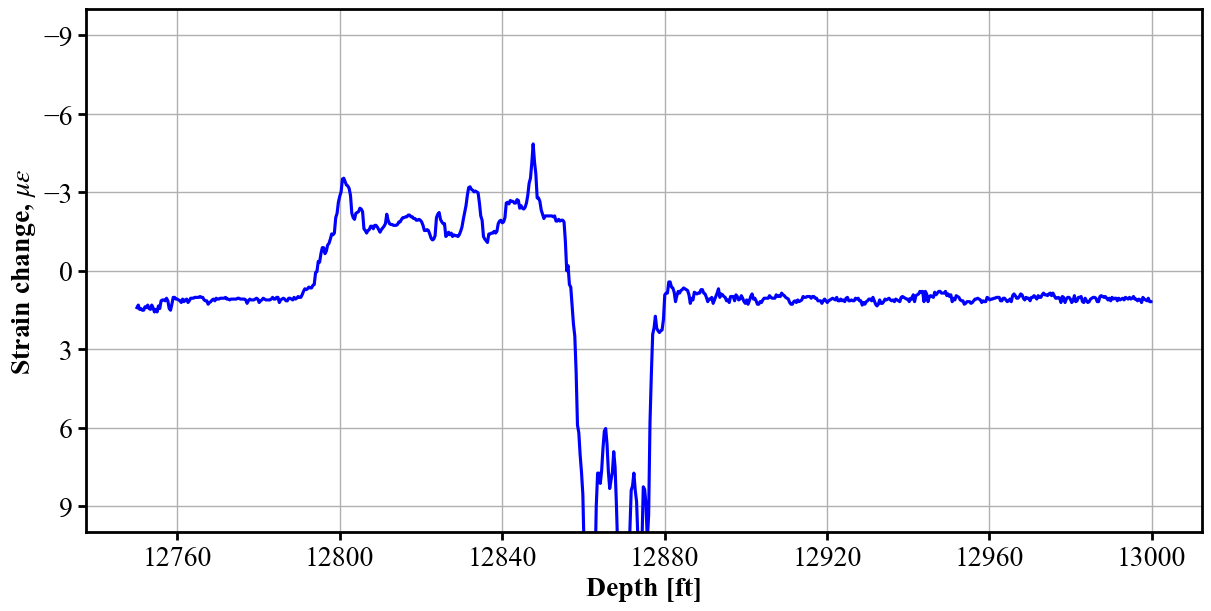

In [100]:

# （可选）把 stamps 转为 DatetimeIndex，便于时间戳就近匹配
stamps_idx = decode_stamps_to_datetimeindex(date_plot, fmt='%m/%d/%Y %H:%M:%S.%f') if date_plot is not None else None

# 1) 用“行号”选多个时刻
# fig, ax = plot_depth_profiles_in_window(
#     dstrain, depth,
#     depth_min=12000, depth_max=16000,
#     times=[5000, 5500],                # 多个时刻（行号）
#     stamps_index=None,                      # 行号选时刻时不用传
#     depth_unit="ft", strain_unit="(microstrain)",
#     grid=True, legend='auto',                # 继承了 make_standard_figure 的风格与图例逻辑
#     figsize = (12, 6)
# )
# # 用你自定义的文本覆盖
# lines = [ln for ln in ax.get_lines() if ln.get_label() != '_nolegend_']
# ax.legend(lines, ["line_5000", "line_5500"])   # 覆盖成你的自定义文本


# 2) 用“时间戳”选多个时刻（需要 stamps_index）
fig, ax = plot_depth_profiles_in_window(
    dstrain, depth, 
    depth_min=12800-50, depth_max=13000,#
    # times=["2022-06-01 07:51:07"],
    times=[#"2022-06-01 08:00:00",
        #    "2022-06-01 08:09:03",
        #    "2022-06-02 08:00:00",
        #    "2022-06-03 08:00:00",
           "2022-06-03 11:00:00",],
        #    "2022-06-04 08:00:00",
        #    "2022-06-05 07:30:00",
        #    "2022-06-06 09:45:00",],   # 多个时刻（时间字符串） #["2022-03-19 18:51:16", "2022-03-14 21:10:00"]

    stamps_index=stamps_idx,                                 # 传入时间索引以最近匹配
    depth_unit="ft", strain_unit=r'$\mu\varepsilon$',
    grid=True, legend='auto',
    figsize = (12, 6)
)

ax.set_ylim(-10,10)
ax.legend(loc='lower left', ncol=2) #'upper left'
leg = ax.get_legend()
if leg is not None:
    leg.remove()

#let the legend in to two columns
# ax.legend(loc='upper right', ncol=2)

# user defined legend labels
# lines = [ln for ln in ax.get_lines() if ln.get_label() != '_nolegend_']
# line_colors = ['navy','pink' , 'green', 'red', 'orange', 'blue']  # Define a list of colors for the lines
# for line, color in zip(lines, line_colors):
#     line.set_color(color)
# ax.legend(lines, ["all shut in", "5H flowback", "5H shut-in", "3H flowback", "3H shut-in", "4H flowback"],loc='lower left', ncol=2)
# adjust lines color (7 lines)

ax.invert_yaxis()  # 深度轴反向


# plot dual axis depth profile

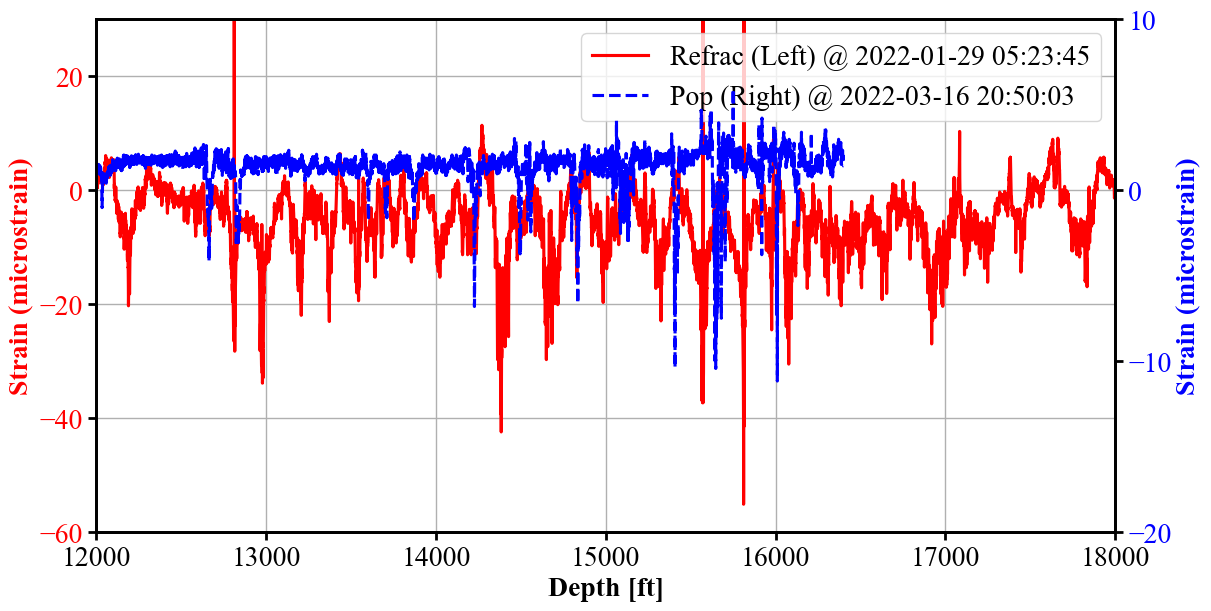

In [ ]:
import h5py
from plot_style import decode_stamps_to_datetimeindex, plot_dual_axis_depth_profile
from matplotlib.ticker import MultipleLocator


# --- 数据源 1（左轴） ---
f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 3 (refrac)/Neubrex_DSS_strain/Zgabay A14H - refrac - strain change.h5','r')

dstrain1 = f1["data"]      # (Nt1, Nz1)
depth1   = f1["depth"]     # (Nz1,)
stamps1  = decode_stamps_to_datetimeindex(f1["stamps"], fmt='%m/%d/%Y %H:%M:%S.%f')  # 如果是其它格式，改这里
times_left = ["2022-01-29 05:23:46"]
window_left = (12000.0, 18000.0)

# --- 数据源 2（右轴） ---
f2 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 5 (POP)/Zgabay A14H - pop - strain change.h5','r')
dstrain2 = f2["data"]      # (Nt2, Nz2)
depth2   = f2["depth"]     # (Nz2,)
stamps2  = decode_stamps_to_datetimeindex(f2["stamps"], fmt='%m/%d/%Y %H:%M:%S.%f')
times_right = ["2022-03-16 20:50:03"] 
window_right = (12000.0, 16400.0)

# --- 画图：x 轴强制 12000–18000 ft，双 y 轴 ---
fig, ax_left, ax_right = plot_dual_axis_depth_profile(
    dstrain_left=dstrain1, depth_left=depth1, times_left=times_left,
    dstrain_right=dstrain2, depth_right=depth2, times_right=times_right,
    depth_window_left=window_left,
    depth_window_right=window_right,
    stamps_index_left=stamps1,
    stamps_index_right=stamps2,

    depth_unit="ft",
    strain_unit_left="(microstrain)",    # 自己改单位显示
    strain_unit_right="(microstrain)",   # 自己改单位显示

    # 如果要取反显示，可以这样开：
    # strain_scale_left=-1.0,
    # strain_scale_right=-1.0,

    invert_left_y=False,                 # ← 左轴是否反转
    invert_right_y=False,                # ← 右轴是否反转
    xlim=(12000.0, 18000.0),             # ← 固定 x 范围
    figsize=(12, 6),
    labels=("Refrac (Left)", "Pop (Right)"),  # 图例前缀
)

# 正常方向（下小上大）
ax_left.set_ylim(-60, 30)
ax_left.yaxis.set_major_locator(MultipleLocator(20))   # 左轴主刻度步长 100

ax_right.set_ylim(-20, 10)
# ax_right.set_yticks([-50, -30, -10, 10])      # 右轴指定刻度
ax_right.yaxis.set_major_locator(MultipleLocator(10))   # 左轴主刻度步长 100
# ax_right.invert_yaxis()

# Fiber slippage calibration

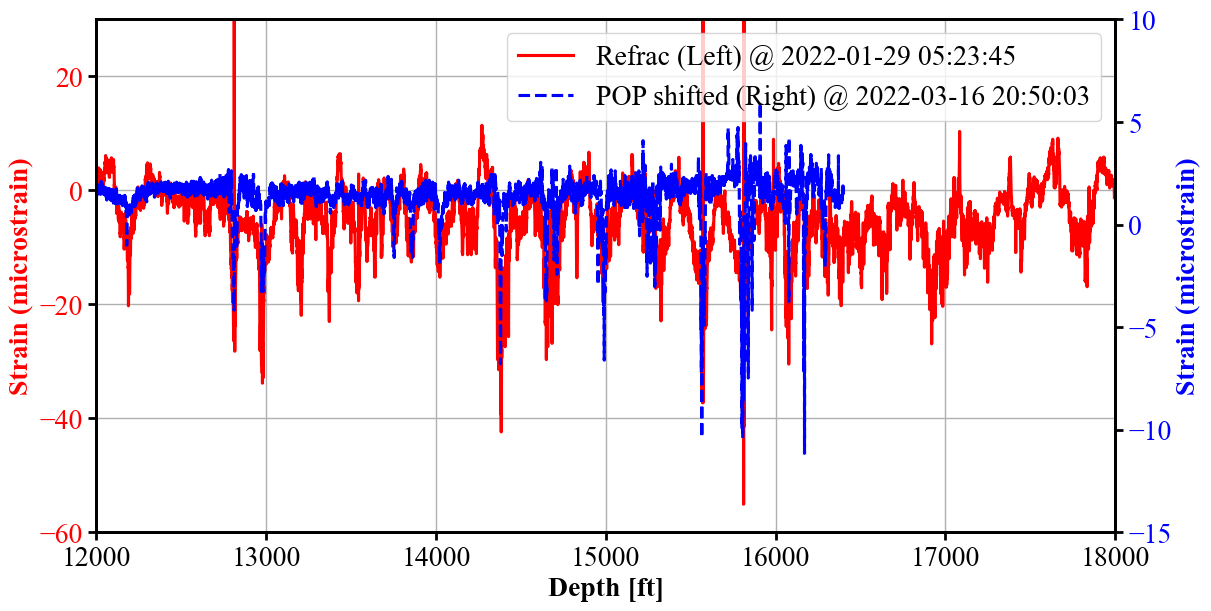

In [8]:

import h5py
from matplotlib.ticker import MultipleLocator
from plot_style import decode_stamps_to_datetimeindex, plot_dual_axis_depth_profile
from slippage_clbrt_shift import shift_depth_piecewise


# ----------------- 你的原始代码 -----------------
# 左轴（refrac）
f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 3 (refrac)/Neubrex_DSS_strain/Zgabay A14H - refrac - strain change.h5','r')
dstrain1 = f1["data"]
depth1   = f1["depth"]
stamps1  = decode_stamps_to_datetimeindex(f1["stamps"], fmt='%m/%d/%Y %H:%M:%S.%f')
times_left  = ["2022-01-29 05:23:46"]
window_left = (12000.0, 18000.0)

# 右轴（POP）
f2 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 5 (POP)/Zgabay A14H - pop - strain change.h5','r')
dstrain2 = f2["data"]
depth2   = f2["depth"]
stamps2  = decode_stamps_to_datetimeindex(f2["stamps"], fmt='%m/%d/%Y %H:%M:%S.%f')
times_right  = ["2022-03-16 20:50:03"]

# === 关键：对 POP 的深度做“分段线性右移” ===
depth2_shifted = shift_depth_piecewise(depth2, z0=12000.0, z1=16000.0, s0=145.0, s1=160.0)

# 右轴选取窗口：现在是“基于平移后的深度”来筛列（保持你原来的 12000~16400）
window_right = (12000.0, 16400.0)

# --- 画图：x 轴强制 12000–18000 ft，双 y 轴 ---
fig, ax_left, ax_right = plot_dual_axis_depth_profile(
    dstrain_left=dstrain1, depth_left=depth1,          times_left=times_left,
    dstrain_right=dstrain2, depth_right=depth2_shifted, times_right=times_right,  # ← 用平移后的 depth
    depth_window_left=window_left,
    depth_window_right=window_right,
    stamps_index_left=stamps1,
    stamps_index_right=stamps2,

    depth_unit="ft",
    strain_unit_left="(microstrain)",
    strain_unit_right="(microstrain)",

    invert_left_y=False,
    invert_right_y=False,
    xlim=(12000.0, 18000.0),
    figsize=(12, 6),
    labels=("Refrac (Left)", "POP shifted (Right)"),
)

# 轴范围/刻度
ax_left.set_ylim(-60, 30)
ax_left.yaxis.set_major_locator(MultipleLocator(20))
ax_right.set_ylim(-15, 10)
ax_right.yaxis.set_major_locator(MultipleLocator(5))


In [ ]:
from slippage_clbrt_shift import shift_depth_piecewise, invert_shift_depth_piecewise

gauges = np.array([13004, 15321, 13753.1])
gauge_to_fiber = invert_shift_depth_piecewise(gauges, z0=12000.0, z1=16000.0, s0=145.0, s1=160.0)
print("测点深度 gauges: ", gauges)
print("对应纤维深度 gauge_to_fiber: ", gauge_to_fiber)


测点深度 gauges:  [13004.  15321.  13753.1]
对应纤维深度 gauge_to_fiber:  [12855.79078456 15164.13449564 13602.09215442]


# plot strain v.s. time in some certain depth

(3415, 57204)


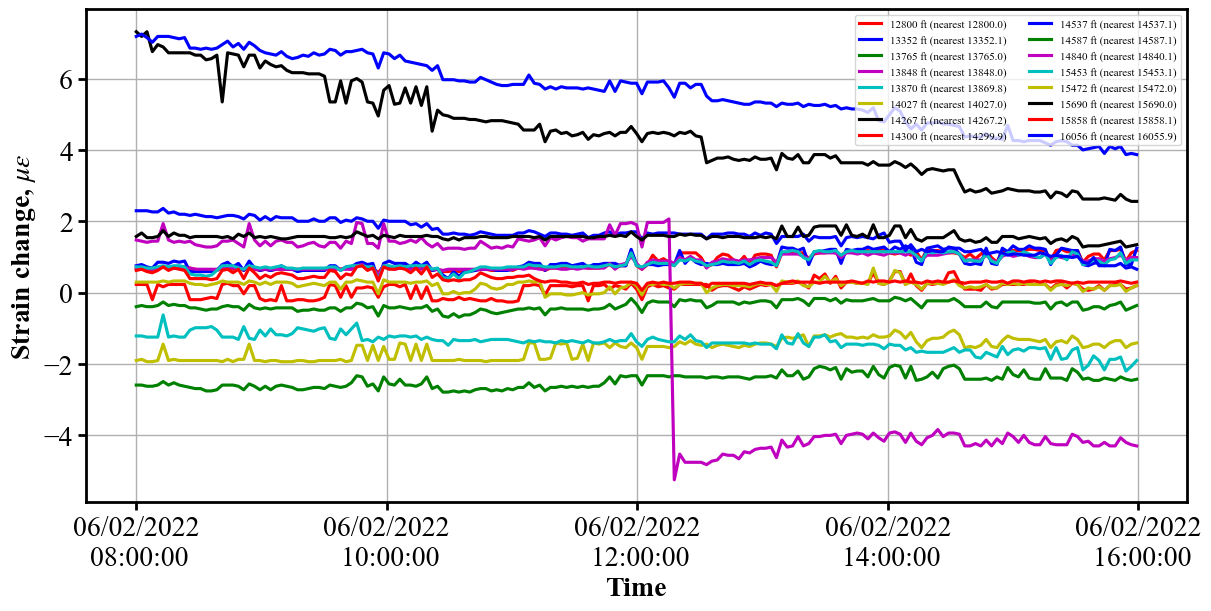

In [96]:
%reload_ext autoreload
%autoreload 2

import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from plot_style import plot_strain_vs_time_at_depths, decode_stamps_to_datetimeindex, save_figure
from matplotlib.ticker import MultipleLocator, FuncFormatter, MaxNLocator, ScalarFormatter, FixedLocator, LogFormatter



# f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 3 (refrac)/Neubrex_DSS_strain/Zgabay A14H - refrac - strain change.h5','r')
# f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 5 (POP)/Zgabay A14H - pop - strain change.h5','r')
f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/Evo_5_6_7_Sep_2025/Evo 7 (flowback)/Zgabay A14H - flowback - strain change.h5','r')
dstrain = (f1['data'])
depth = (f1['depth'])
date_plot = (f1['stamps'])

print(dstrain.shape)  # (时间点数, 深度点数)
# （可选）把 stamps 转为 DatetimeIndex，便于时间戳就近匹配
stamps_idx = decode_stamps_to_datetimeindex(date_plot, fmt='%m/%d/%Y %H:%M:%S.%f') if date_plot is not None else None

# 在 12500 ft 和 16000 ft 这两个深度（最近列），看 strain 随时间
# fig, ax = plot_strain_vs_time_at_depths(
#     dstrain, depth,
#     stamps_index=stamps_idx,
#     target_depths=[12855.79, 15164.13],
#     time_window=("2022-03-15 09:00:00", "2022-03-20 07:30:00"),  # 也可用行号：(500, 1500)
#     scale=1.0,                        # 要换单位直接传 1e6 -> microstrain
#     strain_unit="(microstrain)",
#     figsize=(12, 6), grid=True, legend='auto',
#     # time_format='%m/%d/%Y\n %H:%M:%S',   # ← 这里
#     # time_tick_rotation=0,
#     legend_labels=["Gauge 9", "Gauge 5"],  # 可选：自定义图例  #["12500 ft", "16000 ft"]
# )

# 或：在 16000±25 ft 和 15000±25 ft 窗口里求平均后对比
# fig, ax = plot_strain_vs_time_at_depths(
#     dstrain, depth,
#     stamps_index=stamps_idx,
#     target_depths=[16000, 15000],
#     depth_tolerance=25,
#     reducer="mean",            # 或 "median"
#     scale=1.0, strain_unit="(microstrain)",
#     figsize=(12, 6), grid=True, legend='auto',
#     # time_format='%m/%d/%Y\n %H:%M:%S',   # ← 这里
#     # time_tick_rotation=0,
#     legend_labels=["16000±25 ft", "15000±25 ft"],
# )
# ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
depth_range = np.array([12800, 13352, 13765, 13848, 13870,14027,14267,14300,
                        14537, 14587, 14840, 15453, 15472,15690,15858,16056])
# depth_range = np.array([
#                         12800-3])
# depth_range += 180


fig, ax = plot_strain_vs_time_at_depths(
    dstrain, depth,
    stamps_index=stamps_idx,
    target_depths=depth_range,
    time_window=("2022-06-02 08:00:00", "2022-06-02 16:00:00"),  # 也可用行号：(500, 1500)
    scale=1.0,                        # 要换单位直接传 1e6 -> microstrain
    strain_unit="(microstrain)",
    figsize=(12, 6), grid=True, legend='auto',
    # time_format='%m/%d/%Y\n %H:%M:%S',   # ← 这里
    # time_tick_rotation=0,
    # legend_labels=["index 1", "index 2", "index 3", "index 4", "index 5", "index 6",
    # "index 7", "index 8", "index 9", "index 10", "index 11", "index 12", "index 13", "index 14", "index 15", "index 16",]
    # 可选：自定义图例  ["12500 ft", "16000 ft"]
)
# 将y轴翻转：
# ax.invert_yaxis()
# ax.xaxis.set_major_locator(MaxNLocator(nbins=7))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
# ax.legend(loc='lowre left', ncol=2) #'upper left'
# let legend located out the plot
ax.legend(loc='upper right', ncol=2,fontsize=8)




# leg = ax.get_legend()
# if leg is not None:
#     leg.remove()


# y轴标签
# ax.set_ylabel(r'Strain change, $\mu\varepsilon$')
# save_figure:
# save_figure(fig, 'strain_vs_time_13753ft.png', dpi=600, transparent=False)


# consider some certain time intervals strain change vs depth

## Evo7

dstrain shape: (3415, 57204)

=== Point mapping (target -> matched) ===
P1: target = 2022-06-02 08:00:00, matched = 2022-06-02 08:00:07.017492 (index=566)
P2: target = 2022-06-02 10:00:00, matched = 2022-06-02 10:01:10.413297 (index=613)
P3: target = 2022-06-02 12:00:00, matched = 2022-06-02 11:59:41.716479 (index=659)
P4: target = 2022-06-02 16:00:00, matched = 2022-06-02 15:59:10.001676 (index=752)
P5: target = 2022-06-03 00:00:00, matched = 2022-06-03 00:01:02.633390 (index=939)
P6: target = 2022-06-03 12:00:00, matched = 2022-06-03 11:59:53.654046 (index=1218)


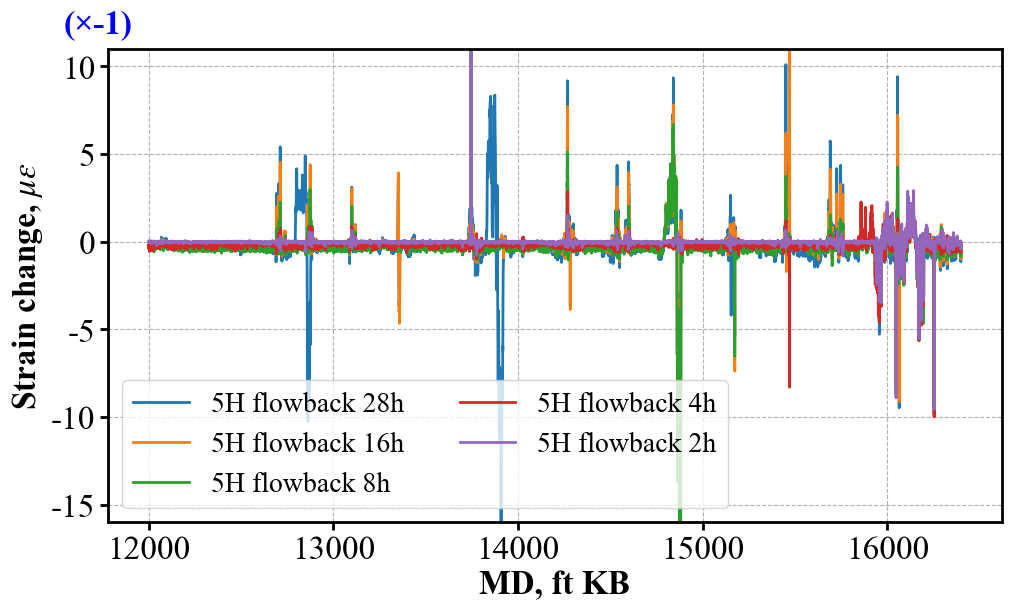

In [15]:
%reload_ext autoreload
%autoreload 2

import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from param import output
from pyparsing import line

from plot_style import make_standard_figure, decode_stamps_to_datetimeindex

# =======================
# 1. 读取 HDF5 数据
# =======================
f1 = h5py.File(
    r'C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/Evo_5_6_7_Sep_2025/Evo 7 (flowback)/Zgabay A14H - flowback - strain change.h5',
    'r'
)

dstrain = f1['data'][...]    # shape: (ntime, ndepth)  时间在前，深度在后
depth   = f1['depth'][...]   # shape: (ndepth,)
stamps  = f1['stamps']       # 原始时间字符串

print("dstrain shape:", dstrain.shape)  # (时间点数, 深度点数)

# 把 stamps 转成 DatetimeIndex，方便做最近匹配
stamps_idx = decode_stamps_to_datetimeindex(
    stamps,
    fmt='%m/%d/%Y %H:%M:%S.%f'
) if stamps is not None else None

# =======================
# 2. 定义深度窗口
# =======================
depth = np.asarray(depth)

depth_min = 12000
depth_max = 16400

depth_mask   = (depth >= depth_min) & (depth <= depth_max)
depth_window = depth[depth_mask]

# =======================
# 3. 定义 test_time → P1...P9
# =======================
# test_time = [
#     datetime.datetime(2022, 6, 1,  8,  0),
#     datetime.datetime(2022, 6, 2,  8,  0),
#     datetime.datetime(2022, 6, 3, 12,  0),
#     datetime.datetime(2022, 6, 4,  8,  0),
#     datetime.datetime(2022, 6, 5,  7, 30),
#     datetime.datetime(2022, 6, 5,  8,  5),
#     datetime.datetime(2022, 6, 5, 12,  0),
#     datetime.datetime(2022, 6, 6,  9, 45),
#     datetime.datetime(2022, 6, 7,  9, 45),
# ]

# 生成 起始点 + 每隔若干小时 的时间点
start_time = datetime.datetime(2022, 6, 2, 8, 0)
test_time = [start_time + datetime.timedelta(hours=h) for h in [0, 2, 4, 8, 16, 28]]   #[0, 2, 4, 8, 16, 28]



# 自动生成 P1...P9 的标签
point_labels = [f"P{i+1}" for i in range(len(test_time))]

# 做成一个字典：P1 -> 目标时间, P2 -> 目标时间 ...
points_target = dict(zip(point_labels, test_time))

# =======================
# 4. 找到每个 Pi 对应的“最近采样点索引”
# =======================
def find_nearest_time_index(idx: pd.DatetimeIndex, target: pd.Timestamp) -> int:
    """
    在 DatetimeIndex idx 中找到距离 target 最近的索引
    """
    deltas = idx - target
    abs_deltas = np.abs(deltas)
    return int(abs_deltas.argmin())

point_indices = {}
point_matched_times = {}

for label, t_target in points_target.items():
    t_target_ts = pd.to_datetime(t_target)
    idx = find_nearest_time_index(stamps_idx, t_target_ts)
    point_indices[label] = idx
    point_matched_times[label] = stamps_idx[idx]

# 打印核对一下
print("\n=== Point mapping (target -> matched) ===")
for label in point_labels:
    print(f"{label}: target = {points_target[label]}, "
          f"matched = {point_matched_times[label]} (index={point_indices[label]})")

# =======================
# 5. 准备每个 Pi 在深度窗口内的 profile
# =======================
profiles = {}  # profiles["P1"] 是一个 1D 数组，对应 P1 的 depth profile

for label in point_labels:
    i = point_indices[label]          # 该时间点在 dstrain 中的行号
    profiles[label] = dstrain[i, depth_mask]

# 到这里你就已经有：
#   profiles["P1"], profiles["P2"], ..., profiles["P9"]
# 每个都是 shape: (N_depth_window,) 的 1D 数组，可以随便做运算

# =======================
# 6. ★★★ 在这里写你自己的运算 ★★★
#    举例：你可以这样写（随便发挥）：
# =======================

# 示例：简单减法（你可以改成任何公式）
# output1 = 1*(profiles["P2"] - profiles["P1"])
# output2 = -1*(profiles["P3"] - profiles["P2"])
# output3 = 1*(profiles["P4"] - profiles["P3"])
# output4 = -1*(profiles["P5"] - profiles["P4"])
# output5 = 1*(profiles["P6"] - profiles["P5"])
# output6 = -1*(profiles["P7"] - profiles["P6"])
# output7 = 1*(profiles["P8"] - profiles["P7"])
# output8 = -1*(profiles["P9"] - profiles["P8"])

output1 = -1*(profiles["P2"] - profiles["P1"])
output2 = -1*(profiles["P3"] - profiles["P1"])
output3 = -1*(profiles["P4"] - profiles["P1"])
output4 = -1*(profiles["P5"] - profiles["P1"])
output5 = -1*(profiles["P6"] - profiles["P1"])


# 你也可以写更复杂的：
# output4 = (profiles["P3"] - profiles["P1"]) / (profiles["P2"] - profiles["P1"] + 1e-6)
# output5 = profiles["P9"]  # 直接用某个点原始 profile 也行

# 把你想画的输出统一放到一个字典里：键 = legend 名字，值 = 1D 数组
# outputs = {
#     "shut-in all wells": output1,
#     "5H flowback": output2,
#     "shut-in 5H": output3,
#     "3H flowback": output4,
#     "shut-in 3H": output5,
#     "3H re-flowback": output6,
#     "shut-in 3H again": output7,
#     "4H flowback": output8,
# }

outputs = {
    "5H flowback 28h": output5,
    "5H flowback 16h": output4,
    "5H flowback 8h": output3,
    "5H flowback 4h": output2,
    "5H flowback 2h": output1,
}

# outputs = {
#     # "Interval 1": output1,
#     "Interval 2": output2,
#     # "Interval 3": output3,
#     "Interval 4": output4,
#     # "Interval 5": output5,
#     "Interval 6": output6,
#     # "Interval 7": output7,
#     "Interval 8": output8,
# }

styles = {
    # "Interval 3": {"linestyle": "-", "alpha": 0.7, "linewidth": 2, "color": "#FF0000"},
    # 你想改别的也可继续加：
    # "Interval 1": {"linestyle": "-", "alpha": 1.0, "linewidth": 2.0},
    # "Interval 2": {"linestyle": "-", "alpha": 1, "linewidth": 2, "color": "blue"},
    # "Interval 1": {"linestyle": "-", "alpha": 1, "linewidth": 2, "color": "green"},
}
default_style = {"linewidth": 2.0, "alpha": 1.0}




# =======================
# 7. 统一可视化 outputs
# =======================
fig, ax = make_standard_figure(figsize=(10, 6)) #color_cycle= ["#0000FF"]



for name, arr in outputs.items():
    # 安全检查一下长度是否和 depth_window 匹配
    if arr.shape != depth_window.shape:
        print(f"Warning: '{name}' shape {arr.shape} != depth_window shape {depth_window.shape}, skip plotting.")
        continue

    style = default_style.copy()
    style.update(styles.get(name, {}))   # Interval 3 会覆盖默认值

    ax.plot(depth_window, arr, label=name, **default_style)


ax.set_xlabel("MD, ft KB")
ax.set_ylabel(r"Strain change, $\mu\varepsilon$")
# ax.set_title("Custom outputs vs. depth (based on P1–P9 profiles)")

ax.set_ylim(-16, 11)

ax.set_yticks(np.arange(-15, 11.1, 5))

ax.grid(True, linestyle='--')
ax.legend(loc="lower left", ncol=2)
ax.set_xticks(np.arange(depth_min, depth_max + 1, 1000))
# invert y axis
# ax.invert_yaxis()
# 在你画完图、设置完坐标轴之后加这句


ax.text(-0.05, 1.02, "(×-1)", transform=ax.transAxes,
        ha="left", va="bottom", fontsize=24,
        fontweight="bold", color="#0000FF")

# plt.tight_layout()
plt.show()


## EVO5 & 7

In [16]:
%reload_ext autoreload
%autoreload 2

import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from param import output

from plot_style import make_standard_figure, decode_stamps_to_datetimeindex

# =======================
# 1. 读取 HDF5 数据
# =======================
f1 = h5py.File(
    r'C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/Evo_5_6_7_Sep_2025/Evo 7 (flowback)/Zgabay A14H - flowback - strain change.h5',
    'r'
)

dstrain = f1['data'][...]    # shape: (ntime, ndepth)  时间在前，深度在后
depth   = f1['depth'][...]   # shape: (ndepth,)
stamps  = f1['stamps']       # 原始时间字符串

print("dstrain shape:", dstrain.shape)  # (时间点数, 深度点数)

# 把 stamps 转成 DatetimeIndex，方便做最近匹配
stamps_idx = decode_stamps_to_datetimeindex(
    stamps,
    fmt='%m/%d/%Y %H:%M:%S.%f'
) if stamps is not None else None

# =======================
# 2. 定义深度窗口
# =======================
depth = np.asarray(depth)

depth_min = 12000
depth_max = 16400

depth_mask   = (depth >= depth_min) & (depth <= depth_max)
depth_window = depth[depth_mask]

# =======================
# 3. 定义 test_time → P1...P9
# =======================
# test_time = [
#     datetime.datetime(2022, 6, 1,  8,  0),
#     datetime.datetime(2022, 6, 2,  8,  0),
#     datetime.datetime(2022, 6, 3, 12,  0),
#     datetime.datetime(2022, 6, 4,  8,  0),
#     datetime.datetime(2022, 6, 5,  7, 30),
#     datetime.datetime(2022, 6, 5,  8,  5),
#     datetime.datetime(2022, 6, 5, 12,  0),
#     datetime.datetime(2022, 6, 6,  9, 45),
#     datetime.datetime(2022, 6, 7,  9, 45),
# ]

# 生成 起始点 + 每隔若干小时 的时间点
start_time = datetime.datetime(2022, 6, 2, 8, 0)
test_time = [start_time + datetime.timedelta(hours=h) for h in [0, 6, 12, 24]]   #[0, 2, 4, 8, 16, 28]



# 自动生成 P1...P9 的标签
point_labels = [f"P{i+1}" for i in range(len(test_time))]

# 做成一个字典：P1 -> 目标时间, P2 -> 目标时间 ...
points_target = dict(zip(point_labels, test_time))

# =======================
# 4. 找到每个 Pi 对应的“最近采样点索引”
# =======================
def find_nearest_time_index(idx: pd.DatetimeIndex, target: pd.Timestamp) -> int:
    """
    在 DatetimeIndex idx 中找到距离 target 最近的索引
    """
    deltas = idx - target
    abs_deltas = np.abs(deltas)
    return int(abs_deltas.argmin())

point_indices = {}
point_matched_times = {}

for label, t_target in points_target.items():
    t_target_ts = pd.to_datetime(t_target)
    idx = find_nearest_time_index(stamps_idx, t_target_ts)
    point_indices[label] = idx
    point_matched_times[label] = stamps_idx[idx]

# 打印核对一下
print("\n=== Point mapping (target -> matched) ===")
for label in point_labels:
    print(f"{label}: target = {points_target[label]}, "
          f"matched = {point_matched_times[label]} (index={point_indices[label]})")

# =======================
# 5. 准备每个 Pi 在深度窗口内的 profile
# =======================
profiles = {}  # profiles["P1"] 是一个 1D 数组，对应 P1 的 depth profile

for label in point_labels:
    i = point_indices[label]          # 该时间点在 dstrain 中的行号
    profiles[label] = dstrain[i, depth_mask]

# 到这里你就已经有：
#   profiles["P1"], profiles["P2"], ..., profiles["P9"]
# 每个都是 shape: (N_depth_window,) 的 1D 数组，可以随便做运算

# =======================
# 6. ★★★ 在这里写你自己的运算 ★★★
#    举例：你可以这样写（随便发挥）：
# =======================

# 示例：简单减法（你可以改成任何公式）
# output1 = profiles["P2"] - profiles["P1"]
# output2 = profiles["P3"] - profiles["P2"]
# output3 = profiles["P4"] - profiles["P3"]
# output4 = profiles["P5"] - profiles["P4"]
# output5 = profiles["P6"] - profiles["P5"]
# output6 = profiles["P7"] - profiles["P6"]
# output7 = profiles["P8"] - profiles["P7"]
# output8 = profiles["P9"] - profiles["P8"]

output1 = -1*(profiles["P2"] - profiles["P1"])
output2 = -1*(profiles["P3"] - profiles["P1"])
output3 = -1*(profiles["P4"] - profiles["P1"])
# output4 = (profiles["P5"] - profiles["P1"])
# output5 = (profiles["P6"] - profiles["P1"])


# 你也可以写更复杂的：
# output4 = (profiles["P3"] - profiles["P1"]) / (profiles["P2"] - profiles["P1"] + 1e-6)
# output5 = profiles["P9"]  # 直接用某个点原始 profile 也行

# 把你想画的输出统一放到一个字典里：键 = legend 名字，值 = 1D 数组
# outputs = {
#     # "shut-in all wells": output1,
#     "5H flowback": output2,
#     # "shut-in 5H": output3,
#     "3H flowback": output4,
#     # "shut-in 3H": output5,
#     "3H re-flowback": output6,
#     # "shut-in 3H again": output7,
#     "4H flowback": output8,
# }

outputs = {
    "5H flowback 12h": output1,
    # "after 4h": output2,
    # "after 8h": output3,
    # "after 16h": output4,
    # "after 28h": output5,
}


# =======================
# 1. 读取 HDF5 数据
# =======================
f2 = h5py.File(
    r'C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/Evo_5_6_7_Sep_2025/Evo 5 (POP)/Zgabay A14H - pop - strain change.h5',
    'r'
)

dstrain2 = f2['data'][...]    # shape: (ntime, ndepth)  时间在前，深度在后
depth2   = f2['depth'][...]   # shape: (ndepth,)
stamps2  = f2['stamps']       # 原始时间字符串

print("dstrain shape:", dstrain2.shape)  # (时间点数, 深度点数)

# 把 stamps 转成 DatetimeIndex，方便做最近匹配
stamps_idx2 = decode_stamps_to_datetimeindex(
    stamps2,
    fmt='%m/%d/%Y %H:%M:%S.%f'
) if stamps2 is not None else None

# =======================
# 2. 定义深度窗口
# =======================
depth2 = np.asarray(depth2)

depth_min2 = 12000
depth_max2 = 16490

depth_mask2   = (depth2 >= depth_min2) & (depth2 <= depth_max2)
depth_window2 = depth2[depth_mask2]

# =======================
# 3. 定义 test_time → P1...P9


# 生成 起始点 + 每隔若干小时 的时间点
start_time2 = datetime.datetime(2022, 3, 15, 9, 0)
test_time2 = [start_time2 + datetime.timedelta(hours=h) for h in [0, 12]]   #[0, 2, 4, 8, 16, 28]

# 自动生成 P1...P9 的标签
point_labels2 = [f"P{i+1}" for i in range(len(test_time2))]

# 做成一个字典：P1 -> 目标时间, P2 -> 目标时间 ...
points_target2 = dict(zip(point_labels2, test_time2))

# =======================
# 4. 找到每个 Pi 对应的“最近采样点索引”
# =======================

point_indices2 = {}
point_matched_times2 = {}

for label2, t_target2 in points_target2.items():
    t_target_ts2 = pd.to_datetime(t_target2)
    idx2 = find_nearest_time_index(stamps_idx2, t_target_ts2)
    point_indices2[label2] = idx2
    point_matched_times2[label2] = stamps_idx2[idx2]

# 打印核对一下
print("\n=== Point mapping (target -> matched) ===")
for label2 in point_labels2:
    print(f"{label2}: target = {points_target2[label2]}, "
          f"matched = {point_matched_times2[label2]} (index={point_indices2[label2]})")

# =======================
# 5. 准备每个 Pi 在深度窗口内的 profile
# =======================
profiles2 = {}  # profiles["P1"] 是一个 1D 数组，对应 P1 的 depth profile

for label2 in point_labels2:
    i = point_indices2[label2]          # 该时间点在 dstrain 中的行号
    profiles2[label2] = dstrain2[i, depth_mask2]

# 到这里你就已经有：
#   profiles["P1"], profiles["P2"], ..., profiles["P9"]
# 每个都是 shape: (N_depth_window,) 的 1D 数组，可以随便做运算


output0 = -1*(profiles2["P2"] - profiles2["P1"])


outputs2 = {
    "5H POP 12h": output2,
    # "after 4h": output2,
    # "after 8h": output3,
    # "after 16h": output4,
    # "after 28h": output5,
}

# =======================
# 7. 统一可视化 outputs
# =======================



dstrain shape: (3415, 57204)

=== Point mapping (target -> matched) ===
P1: target = 2022-06-02 08:00:00, matched = 2022-06-02 08:00:07.017492 (index=566)
P2: target = 2022-06-02 14:00:00, matched = 2022-06-02 14:00:46.125494 (index=706)
P3: target = 2022-06-02 20:00:00, matched = 2022-06-02 20:01:17.307828 (index=846)
P4: target = 2022-06-03 08:00:00, matched = 2022-06-03 08:00:26.988445 (index=1125)
dstrain shape: (7008, 57218)

=== Point mapping (target -> matched) ===
P1: target = 2022-03-15 09:00:00, matched = 2022-03-15 09:00:21.241823 (index=514)
P2: target = 2022-03-15 21:00:00, matched = 2022-03-15 21:00:08.100242 (index=1024)


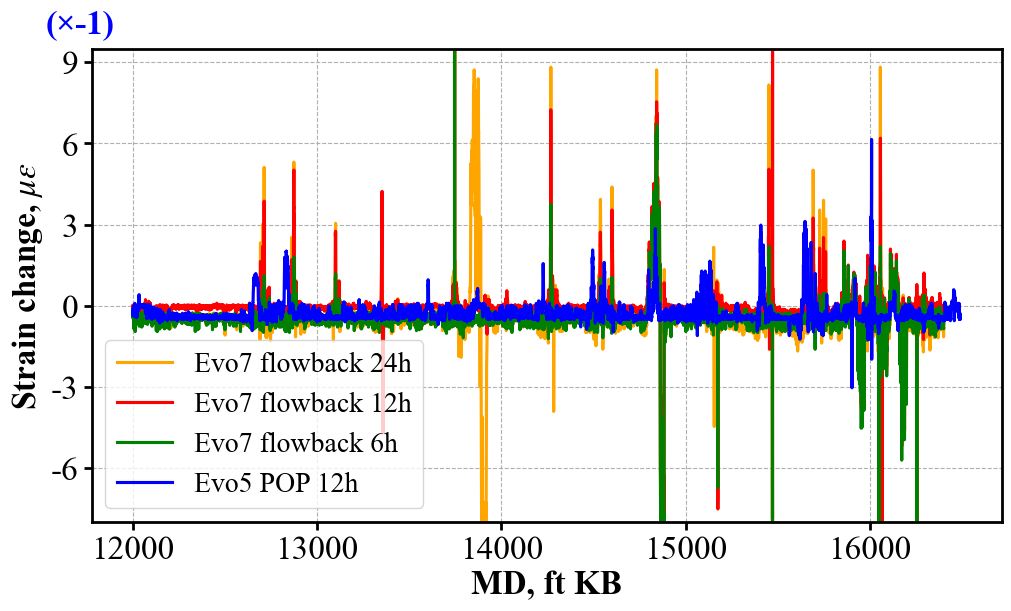

In [18]:



# ===== 合并到一张图画 =====
fig, ax = make_standard_figure(figsize=(10, 6))  # 只建一次
ax.plot(depth_window,  output3, label="Evo7 flowback 24h", color="orange")
ax.plot(depth_window,  output2, label="Evo7 flowback 12h", color="red")
ax.plot(depth_window,  output1, label="Evo7 flowback 6h", color="green")


ax.plot(depth_window2, output0, label="Evo5 POP 12h", color='#0000FF')


ax.set_xlabel("MD, ft KB")
ax.set_ylabel(r"Strain change, $\mu\varepsilon$")
ax.set_ylim(-6, 8)

ax.grid(True, linestyle='--')
ax.legend(loc="lower left", ncol=1)

# x 轴范围建议取重叠区间（可选）
# xmin = max(depth_window.min(), depth_window2.min())
# xmax = min(depth_window.max(), depth_window2.max())
# ax.set_xlim(xmin, xmax)

# ax.set_xticks(np.arange(int(xmin//1000)*1000, int(xmax//1000+1)*1000, 1000))
ax.set_ylim(-8, 9.5)
ax.set_yticks(np.arange(-6, 10, 3))
ax.set_xticks(np.arange(depth_min, depth_max + 1, 1000))

ax.text(-0.05, 1.02, "(×-1)", transform=ax.transAxes,
        ha="left", va="bottom", fontsize=24,
        fontweight="bold", color="#0000FF")


plt.show()



